******************
*******************

# **Description of data**
This data was downloaded from the Hass Avocado Board website (http://www.hassavocadoboard.com/retail/volume-and-price-data) in May of 2018.

Some relevant columns in the dataset:

-Date - The date of the observation

-AveragePrice - the average price of a single avocado

-type - conventional or organic

-year - the year

-Region - the city or region of the observation

-Total Volume - Total number of avocados sold

-4046 - Total number of avocados with PLU 4046 sold

-4225 - Total number of avocados with PLU 4225 sold

-4770 - Total number of avocados with PLU 4770 sold

As an poor student and an Avocado lover, I am interested in apply Machine Learning to find the correlation between average price and volume sale, in order to understand what had caused the Avocadopocalypse of 2017. The simple Economic theory is the sale will lower when the price increase, but in some cases there are exceptions, especially for essential items.

*******************
*******************
# **Libraries**

In [73]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly.express as px
import statsmodels.api as sm
from statsmodels.formula.api import ols
from numpy import percentile

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

*******************
*******************
# **Functions used in notebook**

*If you write a function to help with any of your sections, please put that function here*

In [75]:
# Functions that you develop
#I use this function to split the 'Date' column from format yyyy-mm-dd to separated month and day column
def split_date(column_name, month_arr, day_arr):
    for i in column_name:
        month_arr.append(i.split('-')[1])
        day_arr.append(i.split('-')[2])
        
#Remove outlier function:
def outlier_removal(data):
    for column in data.columns:
        if isinstance(data[column][0],float)==1:
            Q1 = data[column].quantile(.25)
            Q3 = data[column].quantile(.75)
            IQR = Q3-Q1

            index = (data[column] > (Q1 - 1.5 * IQR)) & (data[column] < (Q3 + 1.5 * IQR)) & (data[column] > 0)
            data[column] = np.where(index, data[column],np.nan)
    return data 

#Linear regression model
def model_data(X,y):
    Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,random_state=1)

    model = LinearRegression(fit_intercept=True)
    model.fit(Xtrain,ytrain)
    y_model = model.predict(Xtest)

    print('Training R^2',model.score(Xtrain,ytrain))
    print('Training R^2',model.score(Xtest,ytest))
    print('y = ',model.coef_[0],'*x + ',model.intercept_)

*******************
*******************
# **Getting data**

Pseudocode

1/First , I import all the necessary library and package

2/Import dataset

3/Check the first five rows and the last 5 rows of data to feel the dataset

4/Use .info() to check the state of dataset( null, data type..) to plan the feature enginneering step. 

5/Use .describe() for statistic of the dataset.

After these 5 steps, I will find top 10 best selling regions ( sort by volume) and top 10 regions have the most expansive avocado( sort by average price)

In [76]:
# Code for acquiring data
data = pd.read_csv('avocado.csv')

In [77]:
# Display first 5 rows of data
data.head(5)

Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0           0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1           1  2015-12-20          1.35      54876.98   674.28   44638.81   
2           2  2015-12-13          0.93     118220.22   794.70  109149.67   
3           3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4           4  2015-11-29          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

   year  region  
0  2015  Albany  
1  2015  Albany  
2  2015  Albany  
3  2015  Albany  
4  2015  Albany

In [78]:
# Display last 5 rows of data
data.tail()

Unnamed: 0        Date  AveragePrice  Total Volume     4046     4225  \
18244           7  2018-02-04          1.63      17074.83  2046.96  1529.20   
18245           8  2018-01-28          1.71      13888.04  1191.70  3431.50   
18246           9  2018-01-21          1.87      13766.76  1191.92  2452.79   
18247          10  2018-01-14          1.93      16205.22  1527.63  2981.04   
18248          11  2018-01-07          1.62      17489.58  2894.77  2356.13   

         4770  Total Bags  Small Bags  Large Bags  XLarge Bags     type  year  \
18244    0.00    13498.67    13066.82      431.85          0.0  organic  2018   
18245    0.00     9264.84     8940.04      324.80          0.0  organic  2018   
18246  727.94     9394.11     9351.80       42.31          0.0  organic  2018   
18247  727.01    10969.54    10919.54       50.00          0.0  organic  2018   
18248  224.53    12014.15    11988.14       26.01          0.0  organic  2018   

                 region  
18244  WestTexNewMexico  
18245  WestTexNewMexico  
18246  WestTexNewMexico  
18247  WestTexNewMexico  
18248  WestTexNewMexico

In [79]:
data[(data['region']=='California') & (data['type']=='conventional')]

Unnamed: 0        Date  AveragePrice  Total Volume        4046  \
312            0  2015-12-27          0.90    5040365.47  1833946.59   
313            1  2015-12-20          0.94    4695737.21  1676601.43   
314            2  2015-12-13          0.87    5259354.30  1806690.08   
315            3  2015-12-06          0.78    5775536.27  1943065.50   
316            4  2015-11-29          0.91    4575710.62  1461699.38   
...          ...         ...           ...           ...         ...   
8557           7  2018-02-04          0.80   10894677.77  4473811.63   
8558           8  2018-01-28          1.16    6134040.58  2254631.80   
8559           9  2018-01-21          1.12    6610010.64  2378177.09   
8560          10  2018-01-14          1.27    5927016.73  2098762.55   
8561          11  2018-01-07          1.19    5756632.36  2350838.88   

            4225       4770  Total Bags  Small Bags  Large Bags  XLarge Bags  \
312   1760956.02  232755.85  1212707.01  1090140.07   110737.35     11829.59   
313   1543280.76  266689.82  1209165.20  1061703.58   136747.10     10714.52   
314   1627240.76  232985.13  1592438.33  1404012.00   180150.37      8275.96   
315   2100246.17  221957.26  1510267.34  1376640.91   126664.37      6962.06   
316   1810202.70  222311.07  1081497.47   991568.84    82338.39      7590.24   
...          ...        ...         ...         ...         ...          ...   
8557  4097591.67  146357.78  2176916.69  2072477.62    34196.27     70242.80   
8558  2185495.65  121090.87  1572822.26  1480527.70    24545.94     67748.62   
8559  2590301.70  122950.68  1518581.17  1431898.88    24801.59     61880.70   
8560  2356359.93  151045.33  1320848.92  1226559.09    25390.97     68898.86   
8561  1704810.36  135053.06  1565930.06  1465321.32    25951.12     74657.62   

              type  year      region  
312   conventional  2015  California  
313   conventional  2015  California  
314   conventional  2015  California  
315   conventional  2015  California  
316   conventional  2015  California  
...            ...   ...         ...  
8557  conventional  2018  California  
8558  conventional  2018  California  
8559  conventional  2018  California  
8560  conventional  2018  California  
8561  conventional  2018  California  

[169 rows x 14 columns]

In [80]:
data=data.rename({'Total Volume':'TotalVolume'},axis=1)

In [81]:
# Show data.info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
Unnamed: 0      18249 non-null int64
Date            18249 non-null object
AveragePrice    18249 non-null float64
TotalVolume     18249 non-null float64
4046            18249 non-null float64
4225            18249 non-null float64
4770            18249 non-null float64
Total Bags      18249 non-null float64
Small Bags      18249 non-null float64
Large Bags      18249 non-null float64
XLarge Bags     18249 non-null float64
type            18249 non-null object
year            18249 non-null int64
region          18249 non-null object
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [82]:
# Show data.describe
data.describe()

Unnamed: 0  AveragePrice   TotalVolume          4046          4225  \
count  18249.000000  18249.000000  1.824900e+04  1.824900e+04  1.824900e+04   
mean      24.232232      1.405978  8.506440e+05  2.930084e+05  2.951546e+05   
std       15.481045      0.402677  3.453545e+06  1.264989e+06  1.204120e+06   
min        0.000000      0.440000  8.456000e+01  0.000000e+00  0.000000e+00   
25%       10.000000      1.100000  1.083858e+04  8.540700e+02  3.008780e+03   
50%       24.000000      1.370000  1.073768e+05  8.645300e+03  2.906102e+04   
75%       38.000000      1.660000  4.329623e+05  1.110202e+05  1.502069e+05   
max       52.000000      3.250000  6.250565e+07  2.274362e+07  2.047057e+07   

               4770    Total Bags    Small Bags    Large Bags    XLarge Bags  \
count  1.824900e+04  1.824900e+04  1.824900e+04  1.824900e+04   18249.000000   
mean   2.283974e+04  2.396392e+05  1.821947e+05  5.433809e+04    3106.426507   
std    1.074641e+05  9.862424e+05  7.461785e+05  2.439660e+05   17692.894652   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00       0.000000   
25%    0.000000e+00  5.088640e+03  2.849420e+03  1.274700e+02       0.000000   
50%    1.849900e+02  3.974383e+04  2.636282e+04  2.647710e+03       0.000000   
75%    6.243420e+03  1.107834e+05  8.333767e+04  2.202925e+04     132.500000   
max    2.546439e+06  1.937313e+07  1.338459e+07  5.719097e+06  551693.650000   

               year  
count  18249.000000  
mean    2016.147899  
std        0.939938  
min     2015.000000  
25%     2015.000000  
50%     2016.000000  
75%     2017.000000  
max     2018.000000

In [83]:
#Top 10 best selling region by Total Volume
data.groupby('region').sum()['TotalVolume'].sort_values(ascending = False)[:10]

region
TotalUS         5.864740e+09
West            1.086779e+09
California      1.028982e+09
SouthCentral    1.011280e+09
Northeast       7.132809e+08
Southeast       6.152384e+08
GreatLakes      5.896425e+08
Midsouth        5.083494e+08
LosAngeles      5.078965e+08
Plains          3.111885e+08
Name: TotalVolume, dtype: float64

In [84]:
#Top 10 average price of avocado by region. 
data.groupby('region').median()['AveragePrice'].sort_values(ascending = False)[:10]

region
HartfordSpringfield    1.800
NewYork                1.780
SanFrancisco           1.695
Northeast              1.640
Philadelphia           1.625
Chicago                1.610
Sacramento             1.600
Charlotte              1.585
Albany                 1.560
Boston                 1.555
Name: AveragePrice, dtype: float64

***************
***************
# **Visualizing data**

Pseudocode:

1.Use sns.pairplot to view all the possible plot. From here, I can at least see the linear relation in scatterplot of TotalVolume and Average Price.

2.Plot a scatterplot of Total Volume and Average Price in separated subplot to verify my prediction.

3.Use barchart to plot the average price of avocado each type of avocado(convention and organic, hue = 'type') by region. 

4.Use object-oriented programing to create subplots. Then I will plot some line and boxplot to plot the change in Total Volume and Average Price over time from 2015 to 2018. This will have to see when the price surged and the relationship between those 2 variables .

5.Use countplot to find popular time of year to sell avocado. 

6.For the last visualizaion, I will use distplot to find the distribution of average price, to find the range Avocado usually sell for.



<Figure size 2160x2160 with 0 Axes>

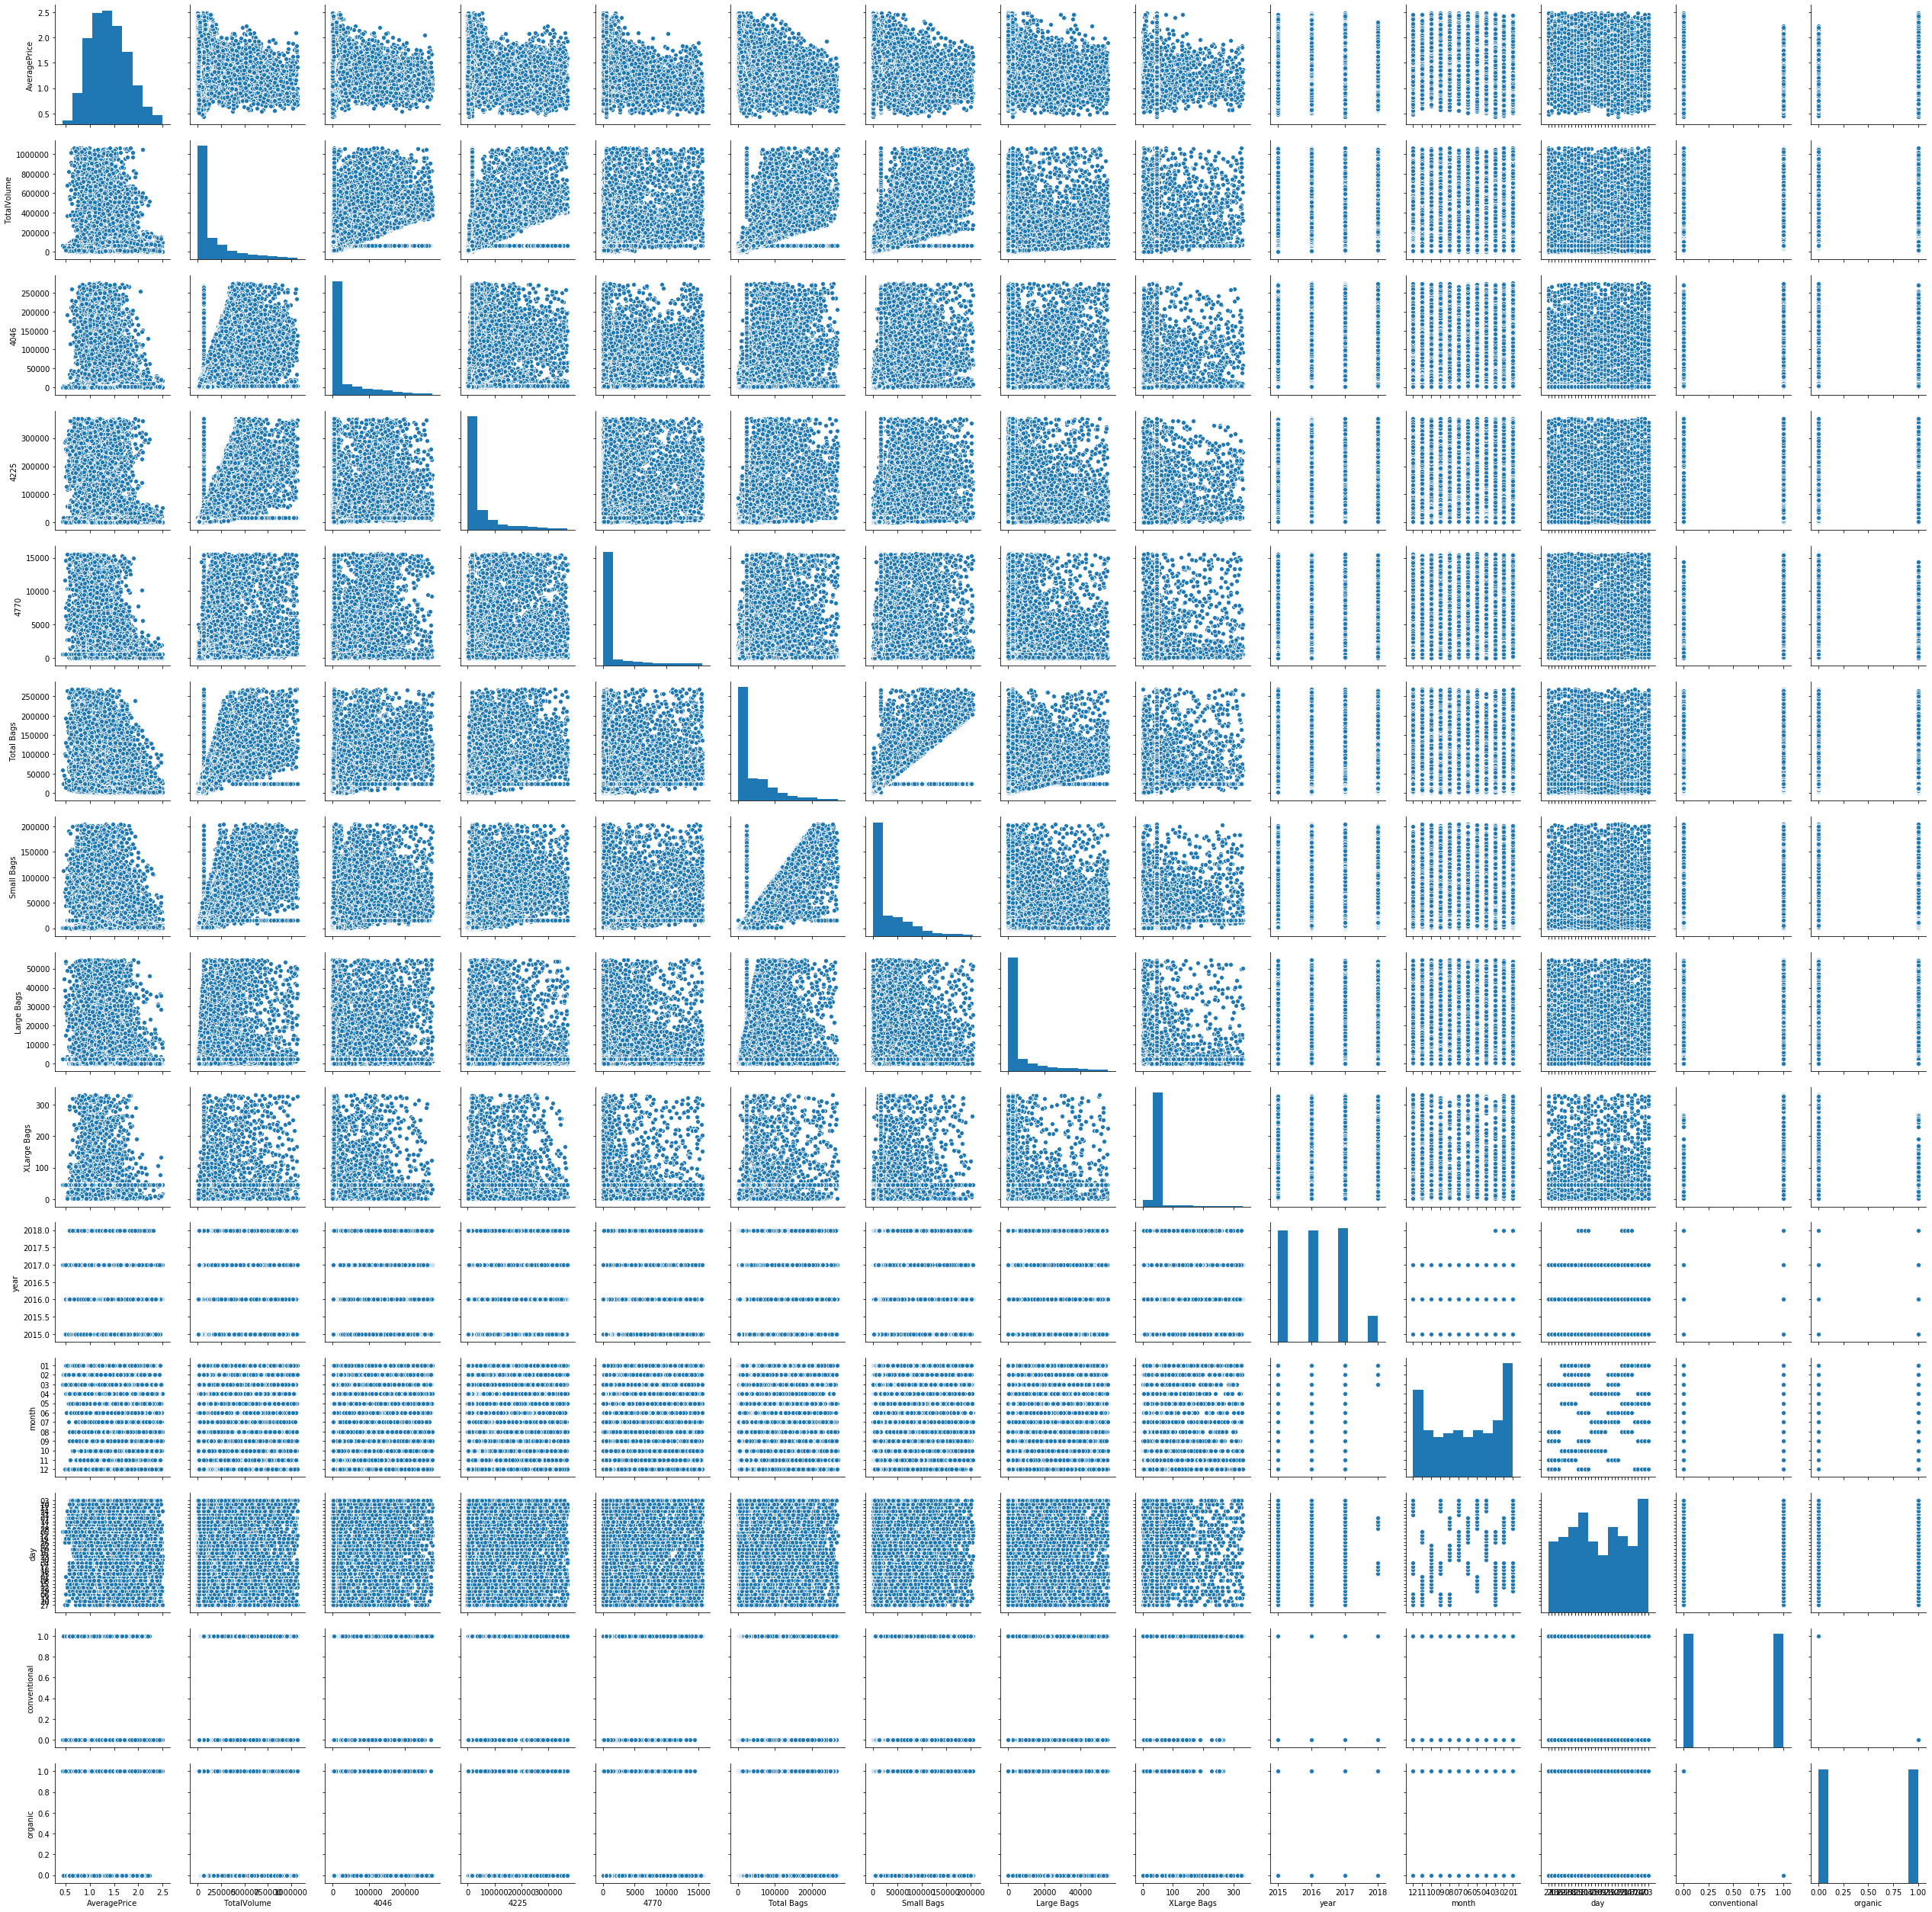

In [96]:
#Visualization 1
#Use pairplot 
plt.figure(figsize=[30,30])
sns.pairplot(data)

Text(0.5, 1.0, 'Scatterplot of AveragePrice and TotalVolume')

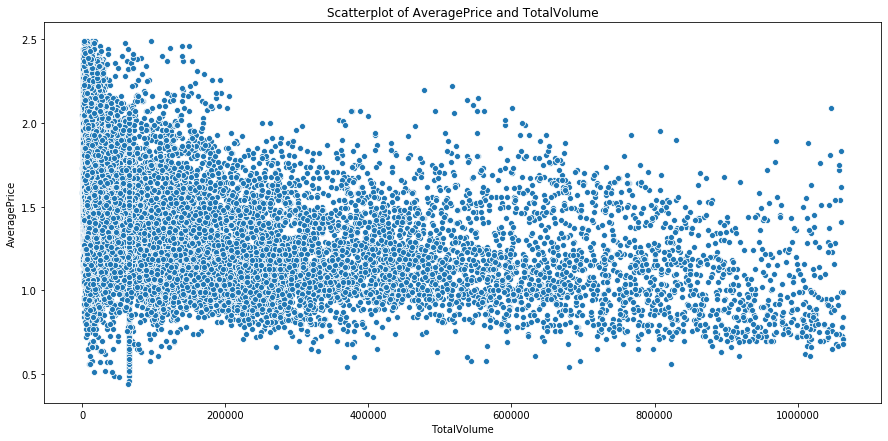

In [110]:
#Visualization 2
fig,axes = plt.subplots(figsize=(15,7))
sns.scatterplot(data=data,x='TotalVolume',y='AveragePrice',ax=axes)
axes.set_title('Scatterplot of AveragePrice and TotalVolume')


Text(0.5, 1, 'Average Price by region')

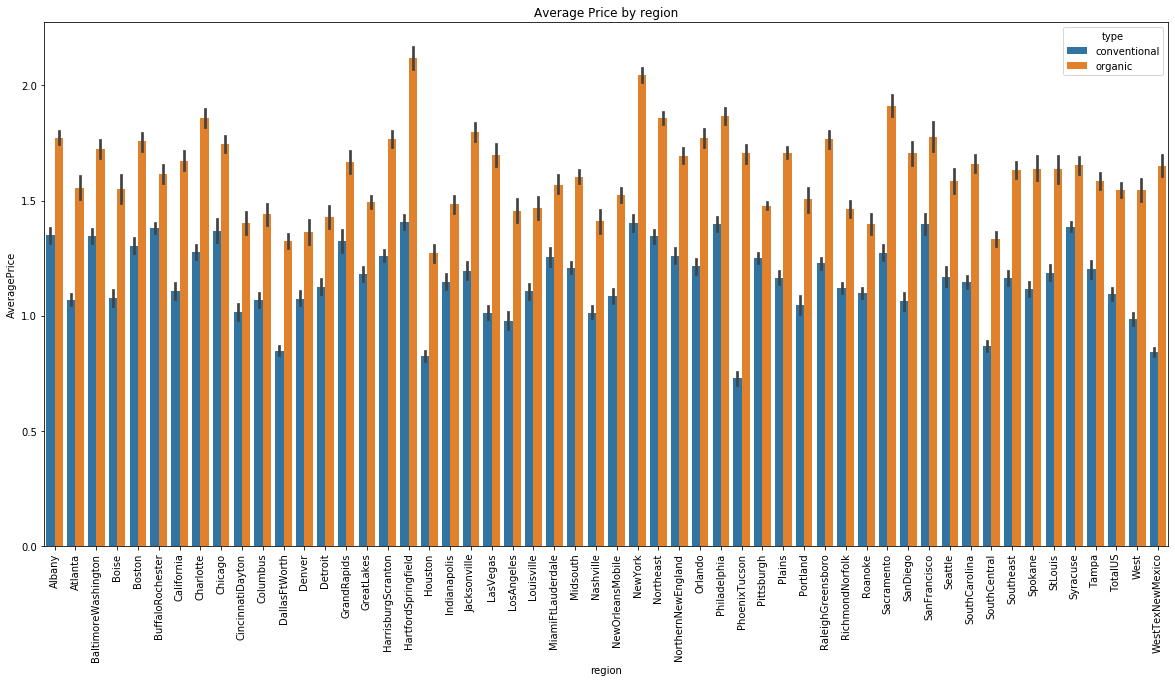

In [111]:
#Visualization 3
fig,axes = plt.subplots(nrows=1, figsize=(17,8))
sns.barplot(data=data,y='AveragePrice',x='region',hue='type',ax=axes)
plt.tight_layout()
plt.xticks(rotation=90)
axes.set_title('Average Price by region')

Text(0, 0.5, 'Total Volume')

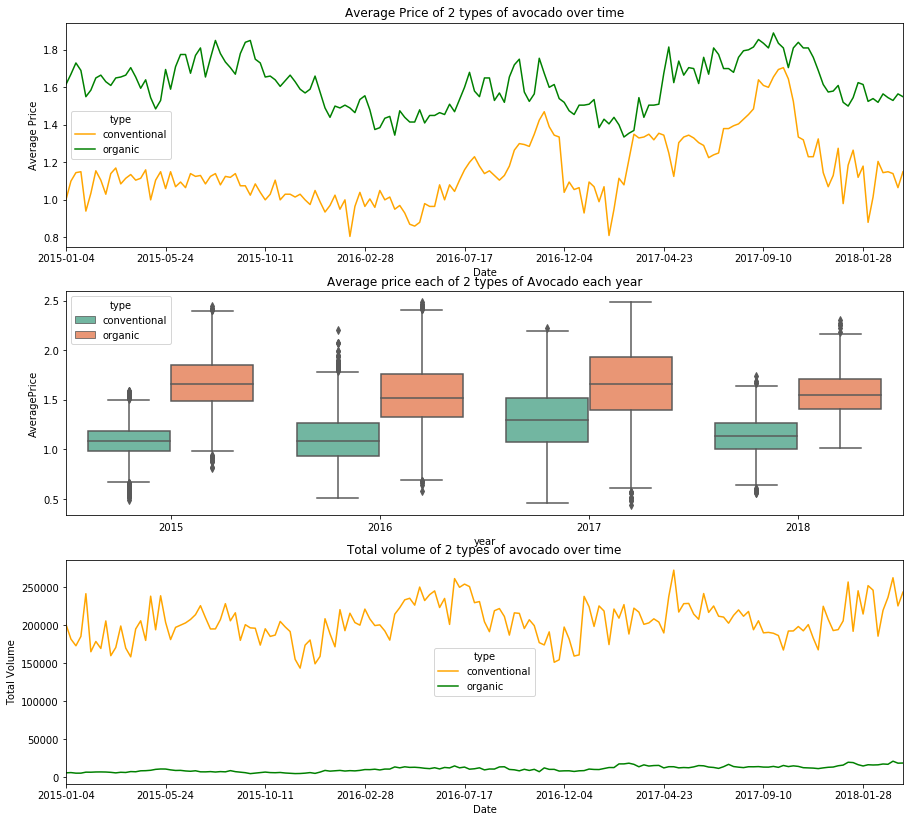

In [112]:
# visualization 4
fig,axes = plt.subplots(nrows=3,figsize=(15,14))
data.groupby(['Date','type']).median()['AveragePrice'].unstack().plot(ax=axes[0],color = ['orange','green'])
axes[0].set_ylabel('Average Price')
axes[0].set_title('Average Price of 2 types of avocado over time')
# average price of 2 types of avocado
sns.boxplot(x = "year", y = "AveragePrice", hue = "type",data=data,ax=axes[1],palette='Set2')
axes[1].set_title('Average price each of 2 types of Avocado each year')
data.groupby(['Date','type']).median()['TotalVolume'].unstack().plot(ax=axes[2],color = ['orange','green'])
axes[2].set_title('Total volume of 2 types of avocado over time')
axes[2].set_ylabel('Total Volume')

As seen from 2 graphs, the price of avocado for both types were at peak on 2017, which was called "Avocadopocalypse of 2017". There is a gap between organic and conventional avacado's price. The price of organic avocado is much higher than conventional avocado, and also more fluctuant.

The price of organic avocado is much higher than conventional avocado, and also more fluctuant.Except 2017, the average price of conventional avodocado did not changed much.

The higher price of organic avocado led to lower sales compare to conventional avocado. When the Avocadopocalypse hit the market in 2017, it did not affect the consumption of organic avocado. We could only see a small bump on 2017, while we can see the peak on conventional avocado. In Economics, we call it "Price effect". When the inflation come to a peak, consumer will choose something cheaper if there is not much trade-off in quality.

Text(0.5, 1.0, 'Monthly Distribution')

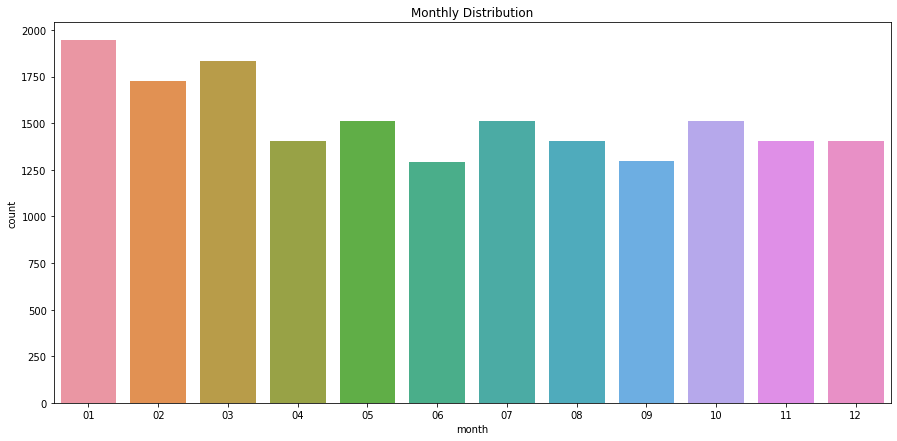

In [113]:
# visualization 5
fig,axes = plt.subplots(figsize=(15,7))
sns.countplot(x='month',data=data,ax=axes)
axes.set_title('Monthly Distribution')

Text(0.5, 1.0, 'Average Price Distribution')

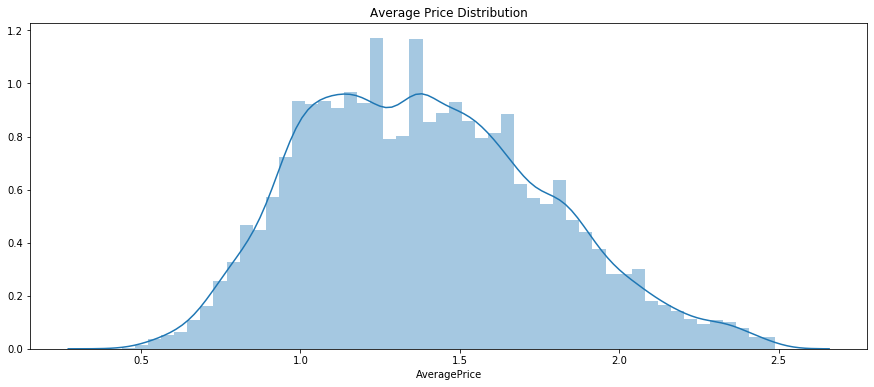

In [114]:
# visualization 6
#Average Price distribution 
fig,axes = plt.subplots(figsize=[15,6])
sns.distplot(data['AveragePrice'].values,ax=axes)
axes.set_xlabel('AveragePrice')
axes.set_title('Average Price Distribution')

***************
***************
# **Feature Engineering**

1.Check if there is any null values.

2.Split the 'date' column to create 'month' and 'day' columns, then concat them into 'data', also frop the column 'Unnamed : 0'(inplace=True).

3.Use OOP, for loop to boxplot every columns to check outlier.

4.Use outlier_removal function define above to remove outlier.

5.Plot again to check. If good, move to next step.

6.Use sns.heatmap to check Na/Nan values. Then I will fill the data with medians.

7.Dummies code the type value( convention = 1, organic = 0)

8.Create a new dataframe with only Total Volume and Price Average of San Franciso, set index='date' to prepare for ML .

In [85]:
# Check and take care of null values
data.isnull()

Unnamed: 0   Date  AveragePrice  TotalVolume   4046   4225   4770  \
0           False  False         False        False  False  False  False   
1           False  False         False        False  False  False  False   
2           False  False         False        False  False  False  False   
3           False  False         False        False  False  False  False   
4           False  False         False        False  False  False  False   
...           ...    ...           ...          ...    ...    ...    ...   
18244       False  False         False        False  False  False  False   
18245       False  False         False        False  False  False  False   
18246       False  False         False        False  False  False  False   
18247       False  False         False        False  False  False  False   
18248       False  False         False        False  False  False  False   

       Total Bags  Small Bags  Large Bags  XLarge Bags   type   year  region  
0           False       False       False        False  False  False   False  
1           False       False       False        False  False  False   False  
2           False       False       False        False  False  False   False  
3           False       False       False        False  False  False   False  
4           False       False       False        False  False  False   False  
...           ...         ...         ...          ...    ...    ...     ...  
18244       False       False       False        False  False  False   False  
18245       False       False       False        False  False  False   False  
18246       False       False       False        False  False  False   False  
18247       False       False       False        False  False  False   False  
18248       False       False       False        False  False  False   False  

[18249 rows x 14 columns]

In [86]:
# Check and take care of string values
month=[]
day=[]
split_date(data['Date'],month,day)
#Add 2 new array to DataFrame
data['month'] = month
data['day'] = day
#also drop unused columns :
data.drop(columns=['Unnamed: 0'],inplace=True)
data.head()

Date  AveragePrice  TotalVolume     4046       4225    4770  \
0  2015-12-27          1.33     64236.62  1036.74   54454.85   48.16   
1  2015-12-20          1.35     54876.98   674.28   44638.81   58.33   
2  2015-12-13          0.93    118220.22   794.70  109149.67  130.50   
3  2015-12-06          1.08     78992.15  1132.00   71976.41   72.58   
4  2015-11-29          1.28     51039.60   941.48   43838.39   75.78   

   Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  \
0     8696.87     8603.62       93.25          0.0  conventional  2015   
1     9505.56     9408.07       97.49          0.0  conventional  2015   
2     8145.35     8042.21      103.14          0.0  conventional  2015   
3     5811.16     5677.40      133.76          0.0  conventional  2015   
4     6183.95     5986.26      197.69          0.0  conventional  2015   

   region month day  
0  Albany    12  27  
1  Albany    12  20  
2  Albany    12  13  
3  Albany    12  06  
4  Albany    11  29

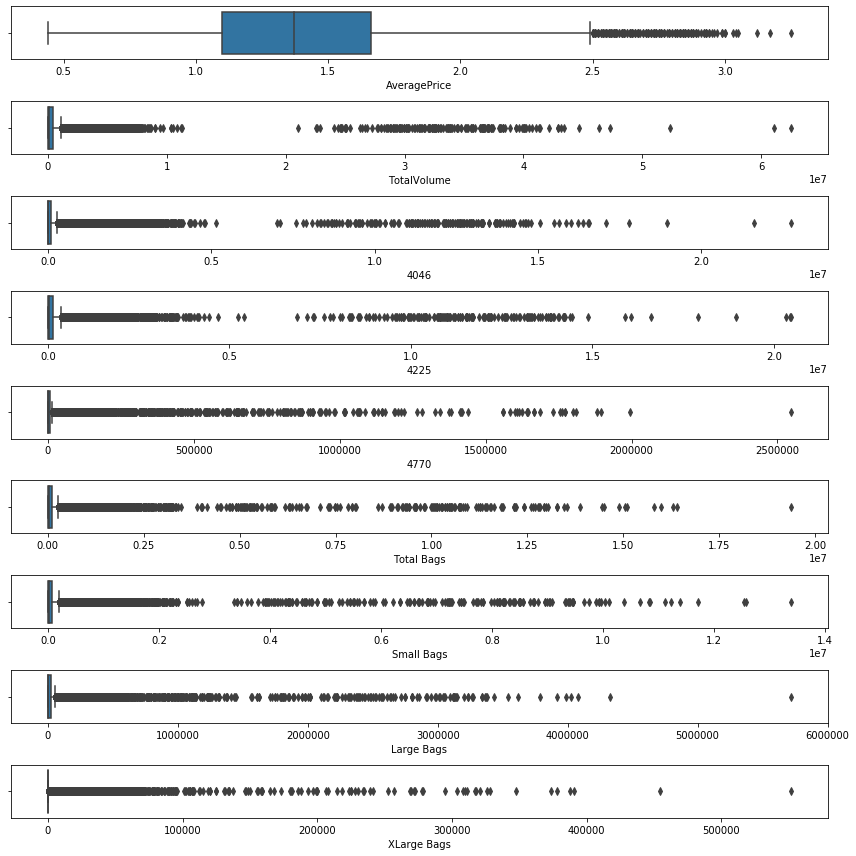

In [87]:
# Check and take care of outliers
fig,axes = plt.subplots(9,1,figsize=(12,12))
count = 0
for column in data.columns:
    if isinstance(data[column][0],float)==1:
        sns.boxplot(x = data[column],ax=axes[count])
        count = count + 1

plt.tight_layout()

As we can see on the boxplots, there are a lot of outliers in every columns. So I am going to remove it using the IQR method.

In [88]:
#Apply functiion we define above to remove outlier
data = outlier_removal(data)

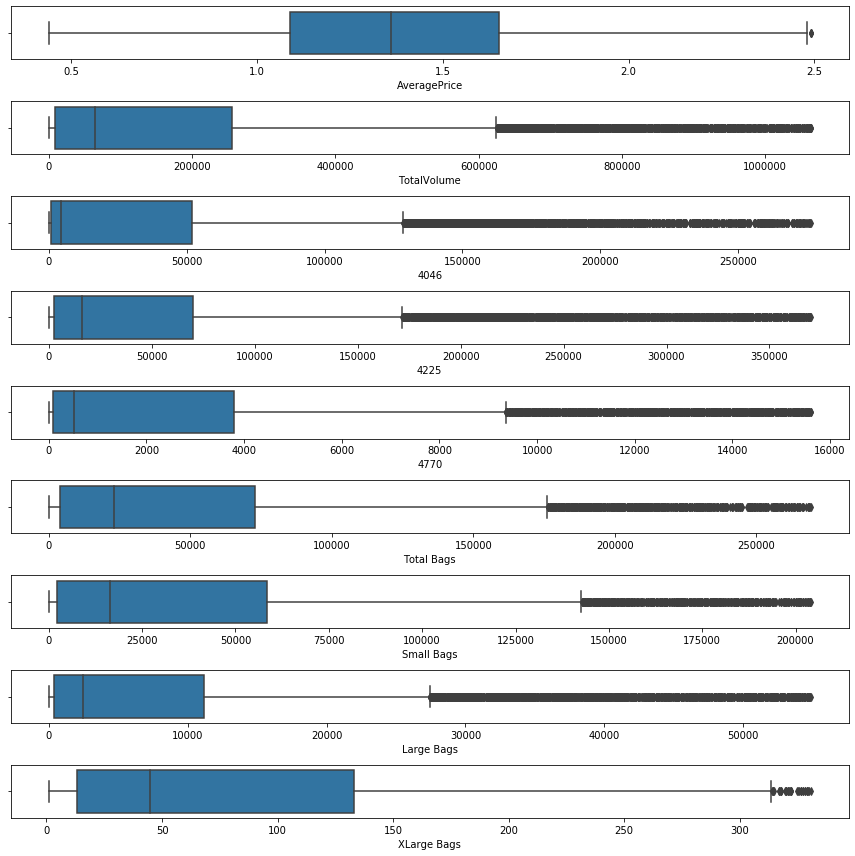

In [89]:
#Plot again to check 
fig,axes = plt.subplots(9,1,figsize=(12,12))
count = 0
for column in data.columns:
    if isinstance(data[column][0],float)==1:
        sns.boxplot(x = data[column],ax=axes[count])
        count = count + 1

plt.tight_layout()

The plots look much better after removing the outliers. Now I am going to check if there is Na/Nan values

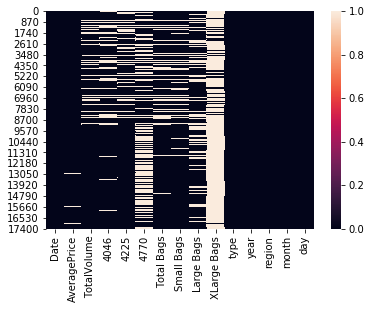

In [90]:
sns.heatmap(data.isnull())

.There are Nan values, so I will fill the Na value by the median 

In [91]:
data = data.fillna(data.median())

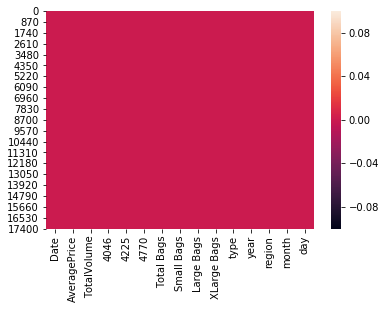

In [92]:
sns.heatmap(data.isnull())

In [93]:

#create new dataset with only average price and total volume of San Francisco area.
sf_data = data[(data['region']=='SanFrancisco') & (data['type']=='conventional')]
sf_data = sf_data[['AveragePrice', 'TotalVolume','Date']].sort_index()
sf_data=sf_data.set_index('Date') # set 'Date' as index
sf_data.head()

AveragePrice  TotalVolume
Date                                 
2015-12-27          1.05    692206.40
2015-12-20          1.15    637091.48
2015-12-13          1.22    616016.46
2015-12-06          1.06    694982.49
2015-11-29          1.05    651638.60

In [94]:
sf_data.shape

(169, 2)

In [95]:
#dummy code
convention_data=pd.get_dummies(data['type'])
#concat to our data dataset
data=pd.concat([data,convention_data],axis=1)
data

Date  AveragePrice  TotalVolume     4046       4225     4770  \
0      2015-12-27          1.33     64236.62  1036.74   54454.85   48.160   
1      2015-12-20          1.35     54876.98   674.28   44638.81   58.330   
2      2015-12-13          0.93    118220.22   794.70  109149.67  130.500   
3      2015-12-06          1.08     78992.15  1132.00   71976.41   72.580   
4      2015-11-29          1.28     51039.60   941.48   43838.39   75.780   
...           ...           ...          ...      ...        ...      ...   
18244  2018-02-04          1.63     17074.83  2046.96    1529.20  507.915   
18245  2018-01-28          1.71     13888.04  1191.70    3431.50  507.915   
18246  2018-01-21          1.87     13766.76  1191.92    2452.79  727.940   
18247  2018-01-14          1.93     16205.22  1527.63    2981.04  727.010   
18248  2018-01-07          1.62     17489.58  2894.77    2356.13  224.530   

       Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  \
0         8696.87     8603.62       93.25         44.8  conventional  2015   
1         9505.56     9408.07       97.49         44.8  conventional  2015   
2         8145.35     8042.21      103.14         44.8  conventional  2015   
3         5811.16     5677.40      133.76         44.8  conventional  2015   
4         6183.95     5986.26      197.69         44.8  conventional  2015   
...           ...         ...         ...          ...           ...   ...   
18244    13498.67    13066.82      431.85         44.8       organic  2018   
18245     9264.84     8940.04      324.80         44.8       organic  2018   
18246     9394.11     9351.80       42.31         44.8       organic  2018   
18247    10969.54    10919.54       50.00         44.8       organic  2018   
18248    12014.15    11988.14       26.01         44.8       organic  2018   

                 region month day  conventional  organic  
0                Albany    12  27             1        0  
1                Albany    12  20             1        0  
2                Albany    12  13             1        0  
3                Albany    12  06             1        0  
4                Albany    11  29             1        0  
...                 ...   ...  ..           ...      ...  
18244  WestTexNewMexico    02  04             0        1  
18245  WestTexNewMexico    01  28             0        1  
18246  WestTexNewMexico    01  21             0        1  
18247  WestTexNewMexico    01  14             0        1  
18248  WestTexNewMexico    01  07             0        1  

[18249 rows x 17 columns]

***************
***************
# **Analysis section**

1.I create X(data[['Total Volume']]) and y(data['AveragePrice']) set to train the model.

2.I am going to use Polynomial method.

3.Split X,y to train and test data, with random_state=1

4.I will do 5 times of Polynomials.Create 2 empty list of training_score and testing_score to store R^2 value for testing and training set between linear and different poly fits. Use for loop to train Linear Regression and plot .

5.Polynomials did not work as expect, so I use OLS but it still did not work as expected. 

6.For second try, I will only apply the traning to smaller dataset( limit the region to San Francisco)

7.Plot the new dataset.

8.Do the same process as 4, and this time the R^2 are better(above 0.5).


In [98]:
X=data[['TotalVolume']]
y=data['AveragePrice']

In [99]:
# Machine Learning 1
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,random_state=1)

1
2
3
4
5


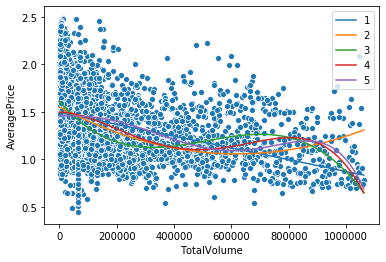

In [100]:
sns.scatterplot(Xtest[Xtest.columns[0]],ytest)
training_score = []
testing_score = []
polys = [1,2,3,4,5]
for degree in polys:
  
    print(degree)
    p = PolynomialFeatures(degree)
    Xp = p.fit_transform(Xtrain) 
    model = LinearRegression() 
    model.fit(Xp, ytrain) 

    sns.lineplot(Xtest[Xtest.columns[0]],model.predict(p.fit_transform(Xtest)),label = str(degree))

    training_score.append(model.score(Xp,ytrain))
    testing_score.append(model.score(p.fit_transform(Xtest),ytest))

plt.legend()

In [101]:
training_score

[0.13794780010734586,
 0.18123262574963905,
 0.23269804828998397,
 0.14037937277283263,
 0.09872369694205718]

In [102]:
testing_score

[0.13086073642089313,
 0.17552804162112967,
 0.2350724209661057,
 0.13473779103380112,
 0.09128550341619235]

The highst R^2 is 0.23, let's try OLS

In [103]:
new_data

AveragePrice  TotalVolume
Date                                 
2015-12-27          1.05    692206.40
2015-12-20          1.15    637091.48
2015-12-13          1.22    616016.46
2015-12-06          1.06    694982.49
2015-11-29          1.05    651638.60
...                  ...          ...
2018-02-04          0.84     65098.19
2018-01-28          1.38    821352.05
2018-01-21          1.01     65098.19
2018-01-14          1.21     65098.19
2018-01-07          1.46    818086.25

[169 rows x 2 columns]

In [104]:
sm_model = ols("AveragePrice ~ TotalVolume", data=data).fit()
print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:           AveragePrice   R-squared:                       0.136
Model:                            OLS   Adj. R-squared:                  0.136
Method:                 Least Squares   F-statistic:                     2877.
Date:                Sat, 05 Sep 2020   Prob (F-statistic):               0.00
Time:                        11:15:52   Log-Likelihood:                -6776.1
No. Observations:               18249   AIC:                         1.356e+04
Df Residuals:                   18247   BIC:                         1.357e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.4907      0.003    466.190      

I think it does not work this way, so I create a new data with the region is only San Francisco

Text(0.5, 1.0, 'San Francisco')

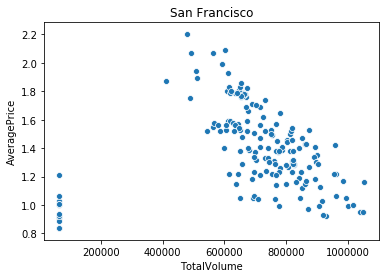

In [105]:
# Machine Learning 2, if needed
fig,axes=plt.subplots()
sns.scatterplot(data = sf_data,x = 'TotalVolume', y = 'AveragePrice',ax=axes)
axes.set_title('San Francisco')


In [106]:
X2=sf_data[['TotalVolume']]
y2=sf_data['AveragePrice']

1
2
3
4
5
6
7


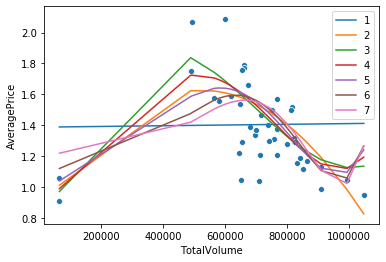

In [115]:
Xtrain2,Xtest2,ytrain2,ytest2 = train_test_split(X2,y2,random_state=1)
sns.scatterplot(Xtest2[Xtest2.columns[0]],ytest2)
training_score2 = []
testing_score2 = []
polys2 = [1,2,3,4,5,6,7]
for degree in polys2:
    print(degree)
    p = PolynomialFeatures(degree)
    Xp2 = p.fit_transform(Xtrain2) 
    model = LinearRegression() 
    model.fit(Xp2, ytrain2) 

    sns.lineplot(Xtest2[Xtest2.columns[0]],model.predict(p.fit_transform(Xtest2)),label = str(degree))

    training_score2.append(model.score(Xp2,ytrain2))
    testing_score2.append(model.score(p.fit_transform(Xtest2),ytest2))

plt.legend()

In [116]:
training_score2

[0.00030708443430182975,
 0.5152944646790483,
 0.5945047164535125,
 0.5645906505487437,
 0.5033661922806858,
 0.4206436710611197,
 0.33591985514081624]

In [117]:
testing_score2

[-0.017566958365412777,
 0.4180516225107249,
 0.5073754663852099,
 0.4678106056257182,
 0.3976132628738822,
 0.31355633807104843,
 0.24539243923111898]

We got better result here. The highest R^2 is 0.59 for training set, 0.507 for testing set.

***************
***************
# **Conclusions**



After doing Polynomial and OLS, the Polynomials still give the best results, for both the whole "data" dataset and the sf_data.

Even though I believe there is a correlation between TotalVolume and AveragePrice, it did not work out well when the highest accuracy I got with the Polynomials only 0.23, while the smaller dataset gave better result(0.59 accuracy). I think I will have to find a better way to work with this dataset.
